# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第13课：
## 官方示例讲解-igraph实例配置

#### 这个例子展示了如何使用igraph的配置实例来设置默认的igraph设置。
#### 这对于全局设置非常有用，这样就不需要在您所从事的每个igraph项目的开始时显式地声明全局设置。

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）
# 示例程序所用库的版本：igraph==0.10.4

In [2]:
import igraph as ig

# Set configuration variables
ig.config["plotting.backend"] = "matplotlib"
ig.config["plotting.layout"] = "fruchterman_reingold"
ig.config["plotting.palette"] = "rainbow"

# Save configuration to ~/.igraphrc
ig.config.save()

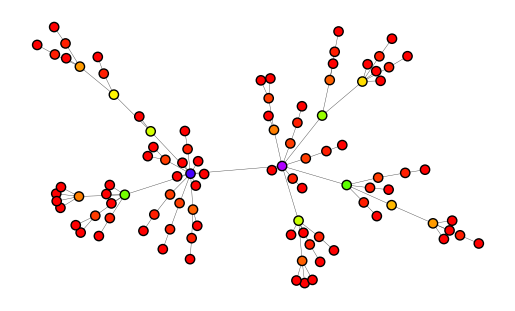

In [3]:
import igraph as ig
import matplotlib.pyplot as plt
import random

# Generate a graph
random.seed(1)
g = ig.Graph.Barabasi(n=100, m=1)

# Calculate a color value between 0-200 for all nodes
# 根据每个节点的介数中心性度量对图进行着色
betweenness = g.betweenness()
colors = [int(i * 200 / max(betweenness)) for i in betweenness]

# Plot the graph
ig.plot(g, vertex_color=colors, vertex_size=1, edge_width=0.3)
plt.show()

#### 此示例演示如何使用字典解包，以便在多个图之间轻松使用相同的视觉样式。
#### 这是一种快速而简单的方法，可以在多个图形之间快速共享单一的视觉样式，而不必为绘制的每个图形重复复制和粘贴每个单独的属性。

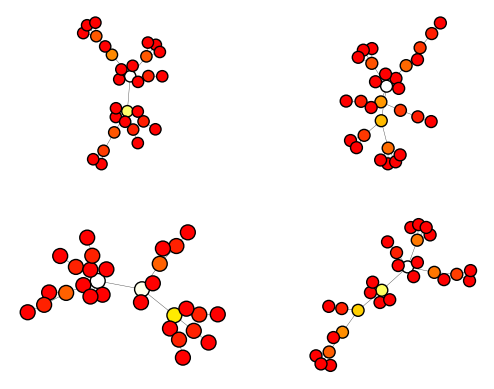

In [4]:
import igraph as ig
import matplotlib.pyplot as plt
import math
import random

# Configure visual style
visual_style = {
    "edge_width": 0.3,
    "vertex_size": 1.5,
    "palette": "heat",
    "layout": "fruchterman_reingold"
}

# Generate four random graphs
random.seed(1)
gs = [ig.Graph.Barabasi(n=30, m=1) for i in range(4)]

# Calculate colors between 0-255 for all nodes
betweenness = [g.betweenness() for g in gs]
colors = [[int(i * 255 / max(btw)) for i in btw] for btw in betweenness]

# Plot the graphs, using the same predefined visual style for both
fig, axs = plt.subplots(2, 2)
axs = axs.ravel()
for g, color, ax in zip(gs, colors, axs):
    ig.plot(g, target=ax, vertex_color=color, **visual_style)
plt.show()